
单因素方差分析结果(对p值进行FDR BH矫正):
                             Variable        F        p  Eta_squared  p_corr
Reaction_times_in_incongruent_stimuli 9.027209 0.000155     0.055887   0.000
           Stroop_interference_effect 0.995296 0.370811     0.006484   0.371

变量: Reaction_times_in_incongruent_stimuli
亚组I与健康对照组的Cohen's d: 0.329
亚组II与健康对照组的Cohen's d: 0.572
置换检验p值: 0.159
各组均值和标准差:
          Group    mean     std
Healthy control -30.761 143.113
      Subtypt I  18.620 157.159
     Subtypt II  53.425 151.381
事后检验结果(使用FDR BH校正):
              A          B  p-corr  Cohen_d
Healthy control  Subtypt I   0.092   -0.329
Healthy control Subtypt II   0.000   -0.572
      Subtypt I Subtypt II   0.352   -0.226


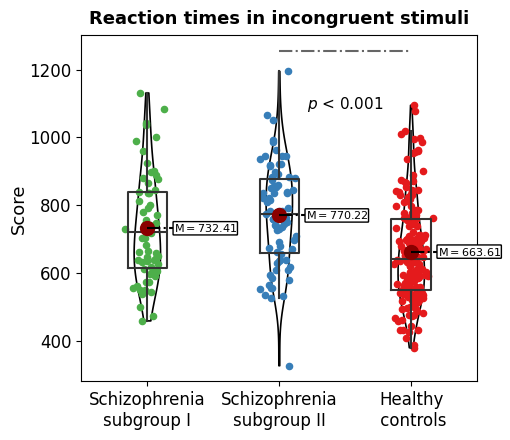



所有事后检验完成。

单因素方差分析结果(对p值进行FDR BH矫正):
                Variable        F        p  Eta_squared  p_corr
Accuracy_in_No_Go_trials 4.607387 0.010682     0.029326   0.011
          Switching_cost 6.589980 0.001578     0.041423   0.003

变量: Accuracy_in_No_Go_trials
亚组I与健康对照组的Cohen's d: -0.364
亚组II与健康对照组的Cohen's d: -0.325
置换检验p值: 0.812
各组均值和标准差:
          Group   mean   std
Healthy control  0.018 0.109
      Subtypt I -0.025 0.128
     Subtypt II -0.018 0.115
事后检验结果(使用FDR BH校正):
              A          B  p-corr  Cohen_d
Healthy control  Subtypt I   0.085    0.364
Healthy control Subtypt II   0.089    0.325
      Subtypt I Subtypt II   0.933   -0.057


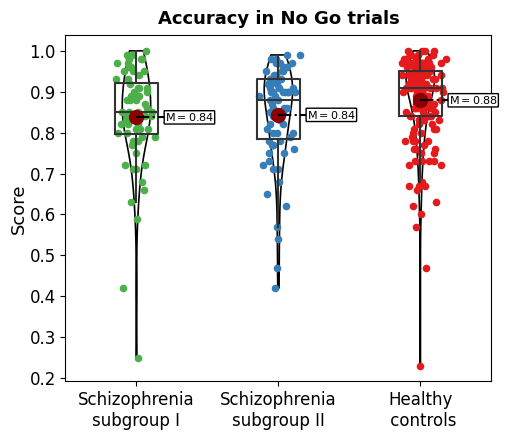



变量: Switching_cost
亚组I与健康对照组的Cohen's d: 0.431
亚组II与健康对照组的Cohen's d: 0.394
置换检验p值: 0.831
各组均值和标准差:
          Group    mean     std
Healthy control -50.363 236.093
      Subtypt I  64.311 293.528
     Subtypt II  58.605 312.218
事后检验结果(使用FDR BH校正):
              A          B  p-corr  Cohen_d
Healthy control  Subtypt I   0.016   -0.431
Healthy control Subtypt II   0.016   -0.394
      Subtypt I Subtypt II   0.991    0.019


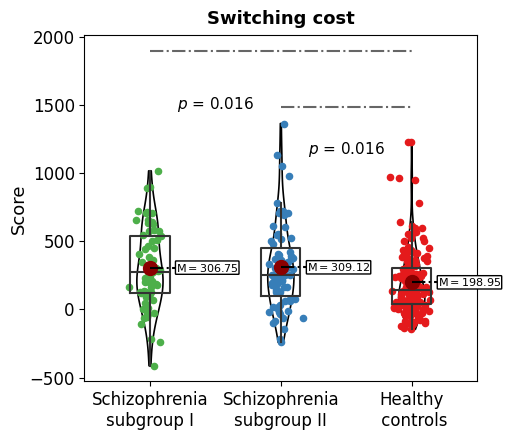



所有事后检验完成。

单因素方差分析结果(对p值进行FDR BH矫正):
                        Variable        F        p  Eta_squared  p_corr
             Accuracy_in_1750_ms 6.617930 0.001536     0.041591   0.002
              Accuracy_in_750_ms 7.867994 0.000466     0.049062   0.001
Span_in_digit_span_backward_task 4.922259 0.007872     0.031268   0.008

变量: Accuracy_in_1750_ms
亚组I与健康对照组的Cohen's d: -0.321
亚组II与健康对照组的Cohen's d: -0.467
置换检验p值: 0.394
各组均值和标准差:
          Group   mean   std
Healthy control  0.042 0.211
      Subtypt I -0.032 0.246
     Subtypt II -0.067 0.251
事后检验结果(使用FDR BH校正):
              A          B  p-corr  Cohen_d
Healthy control  Subtypt I   0.110    0.321
Healthy control Subtypt II   0.006    0.467
      Subtypt I Subtypt II   0.647    0.139


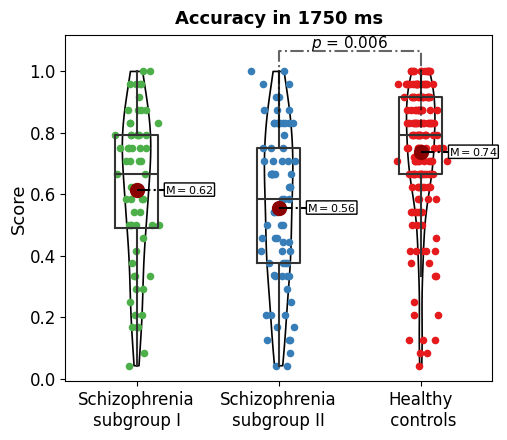



变量: Accuracy_in_750_ms
亚组I与健康对照组的Cohen's d: -0.106
亚组II与健康对照组的Cohen's d: -0.528
置换检验p值: 0.014
各组均值和标准差:
          Group   mean   std
Healthy control  0.037 0.207
      Subtypt I  0.012 0.261
     Subtypt II -0.094 0.282
事后检验结果(使用FDR BH校正):
              A          B  p-corr  Cohen_d
Healthy control  Subtypt I   0.758    0.106
Healthy control Subtypt II   0.001    0.528
      Subtypt I Subtypt II   0.039    0.389


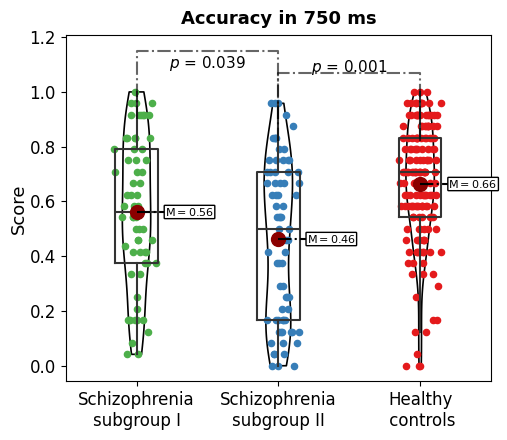



变量: Span_in_digit_span_backward_task
亚组I与健康对照组的Cohen's d: -0.264
亚组II与健康对照组的Cohen's d: -0.438
置换检验p值: 0.316
各组均值和标准差:
          Group   mean   std
Healthy control  0.268 1.843
      Subtypt I -0.206 1.747
     Subtypt II -0.427 1.278
事后检验结果(使用FDR BH校正):
              A          B  p-corr  Cohen_d
Healthy control  Subtypt I   0.212    0.264
Healthy control Subtypt II   0.029    0.438
      Subtypt I Subtypt II   0.726    0.144


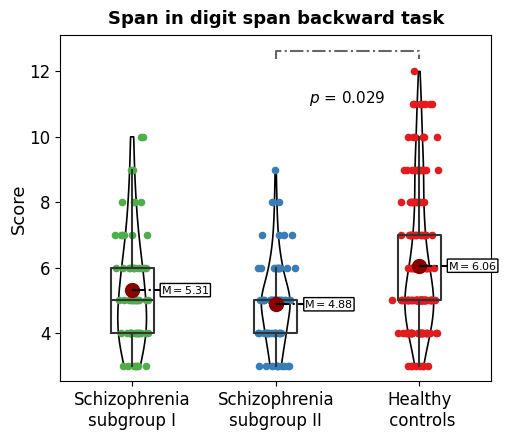



所有事后检验完成。


In [4]:
import pandas as pd
import pingouin as pg
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.multitest import multipletests
import numpy as np
import warnings
import matplotlib.pyplot as plt
import os
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

# 忽略SettingWithCopyWarning警告
warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

# 绘图颜色和位置设置
BG_WHITE = '#ffffff'
BLACK = "#000000"
GREY_DARK = "#333333"
RED_DARK = "#8B0000"
COLOR_SCALE = ["#4daf4a", "#377eb8", "#e41a1c"]
POSITIONS = [0, 1, 2]

def analyze_data(data, dependent_vars, covariates_cont, socio_demo_vars_cat, output_folder):
    # 替换Group中的数值为描述性标签
    data.loc[:, 'Group'] = data['Group'].replace({0: 'Subtypt I', 1: 'Subtypt II', 2: 'Healthy control'})
    # 创建一个虚拟的被试变量
    data['Subject'] = range(1, len(data) + 1)

    # One-Hot编码社会人口学分类变量
    data = pd.get_dummies(data, columns=socio_demo_vars_cat, drop_first=False)

    # 将虚拟变量显式转换为数值型
    for var in [col for col in data.columns if any(v in col for v in socio_demo_vars_cat)]:
        data[var] = data[var].astype(float)

    # 更新协变量列表,包括连续型协变量和虚拟变量
    covariates = covariates_cont + [col for col in data.columns if any(var in col for var in socio_demo_vars_cat)]

    # 使用GLM模型,将执行功能变量回归掉社会人口学变量,得到残差
    residuals = pd.DataFrame()
    for var in dependent_vars:
        formula = f"{var} ~ {' + '.join(covariates)}"
        model = ols(formula, data).fit()
        residuals[var] = model.resid

    # 将Group变量添加到残差数据框中
    residuals['Group'] = data['Group']

    # 针对三组残差进行单因素方差分析
    anova_results = []
    for var in dependent_vars:
        group1 = residuals[residuals['Group'] == 'Subtypt I'][var]
        group2 = residuals[residuals['Group'] == 'Subtypt II'][var]
        group3 = residuals[residuals['Group'] == 'Healthy control'][var]

        f, p = f_oneway(group1, group2, group3)
        eta_squared = (f * 2) / (f * 2 + residuals.shape[0] - 3)  # 计算效应量
        anova_results.append({'Variable': var, 'F': f, 'p': p, 'Eta_squared': eta_squared})

    anova_results_df = pd.DataFrame(anova_results)

    # 对p值进行FDR BH矫正
    anova_results_df['p_corr'] = multipletests(anova_results_df['p'], method='fdr_bh')[1]
    anova_results_df['p_corr'] = anova_results_df['p_corr'].round(3)

    # 打印单因素方差分析的结果
    print("\n单因素方差分析结果(对p值进行FDR BH矫正):")
    print(anova_results_df.to_string(index=False))

    # 对p值显著的变量进行事后检验,并按三线表输出
    for _, row in anova_results_df[anova_results_df['p_corr'] < 0.06].iterrows():
        var = row['Variable']
        print(f"\n变量: {var}")


        # 计算亚组I与健康对照组、亚组II与健康对照组的Cohen's d值
        group1_data = residuals[residuals['Group'] == 'Subtypt I'][var]
        group2_data = residuals[residuals['Group'] == 'Subtypt II'][var]
        group3_data = residuals[residuals['Group'] == 'Healthy control'][var]

        cohen_d_1_3 = (group1_data.mean() - group3_data.mean()) / np.sqrt((group1_data.var() + group3_data.var()) / 2)
        cohen_d_2_3 = (group2_data.mean() - group3_data.mean()) / np.sqrt((group2_data.var() + group3_data.var()) / 2)

        print(f"亚组I与健康对照组的Cohen's d: {cohen_d_1_3:.3f}")
        print(f"亚组II与健康对照组的Cohen's d: {cohen_d_2_3:.3f}")

        # 进行置换检验
        num_permutations = 10000
        diff_observed = np.abs(cohen_d_1_3 - cohen_d_2_3)
        combined_data = np.concatenate((group1_data, group2_data, group3_data))

        diff_permuted = []
        for _ in range(num_permutations):
            permuted_data = np.random.permutation(combined_data)
            perm_group1 = permuted_data[:len(group1_data)]
            perm_group2 = permuted_data[len(group1_data):len(group1_data) + len(group2_data)]
            perm_group3 = permuted_data[len(group1_data) + len(group2_data):]

            perm_cohen_d_1_3 = (perm_group1.mean() - perm_group3.mean()) / np.sqrt((perm_group1.var() + perm_group3.var()) / 2)
            perm_cohen_d_2_3 = (perm_group2.mean() - perm_group3.mean()) / np.sqrt((perm_group2.var() + perm_group3.var()) / 2)

            diff_permuted.append(np.abs(perm_cohen_d_1_3 - perm_cohen_d_2_3))

        p_value = (np.sum(diff_permuted >= diff_observed) + 1) / (num_permutations + 1)

        print(f"置换检验p值: {p_value:.3f}")
        
        # 计算每组的均值和标准差
        group_stats = residuals.groupby('Group')[var].agg(['mean', 'std']).reset_index()
        group_stats['mean'] = group_stats['mean'].round(3)
        group_stats['std'] = group_stats['std'].round(3)

        print("各组均值和标准差:")
        print(group_stats.to_string(index=False))

        # 进行事后检验
        post_hoc = pg.pairwise_tukey(dv=var, between='Group', data=residuals)
        post_hoc['p-unc'] = post_hoc['p-tukey']  # 保存未矫正的p值
        post_hoc['p-corr'] = multipletests(post_hoc['p-tukey'], method='fdr_bh')[1]
        post_hoc['p-tukey'] = post_hoc['p-tukey'].round(3)
        post_hoc['p-corr'] = post_hoc['p-corr'].round(3)

        # 计算事后比较的效应量
        for _, ph_row in post_hoc.iterrows():
            group1_data = residuals[residuals['Group'] == ph_row['A']][var]
            group2_data = residuals[residuals['Group'] == ph_row['B']][var]
            cohen_d = (group1_data.mean() - group2_data.mean()) / np.sqrt((group1_data.var() + group2_data.var()) / 2)
            post_hoc.loc[post_hoc.index == ph_row.name, 'Cohen_d'] = cohen_d

        post_hoc['Cohen_d'] = post_hoc['Cohen_d'].round(3)
        print("事后检验结果(使用FDR BH校正):")
        print(post_hoc[['A', 'B', 'p-corr', 'Cohen_d']].to_string(index=False))

        # 绘制箱线图和小提琴图
        fig, ax = plt.subplots(figsize=(5.2, 4.5))

        # Layout settings
        fig.patch.set_facecolor(BG_WHITE)
        ax.set_facecolor(BG_WHITE)

        # 获取三组原始数据
        group1_data = data[data['Group'] == 'Subtypt I'][var]
        group2_data = data[data['Group'] == 'Subtypt II'][var]
        group3_data = data[data['Group'] == 'Healthy control'][var]

        # Violin plot
        y_data = [group1_data, group2_data, group3_data]
        violins = ax.violinplot(
            y_data,
            positions=POSITIONS,
            widths=0.2,
            bw_method="silverman",
            showmeans=False,
            showmedians=False,
            showextrema=False
        )

        for pc in violins["bodies"]:
            pc.set_facecolor("none")
            pc.set_edgecolor(BLACK)
            pc.set_linewidth(1.2)
            pc.set_alpha(1)

        # Box plot properties
        medianprops = dict(
            linewidth=1.5,
            color=GREY_DARK,
            solid_capstyle="butt"
        )
        boxprops = dict(
            linewidth=1.5,
            color=GREY_DARK
        )

        ax.boxplot(
            y_data,
            positions=POSITIONS,
            showfliers=False,
            showcaps=False,
            medianprops=medianprops,
            whiskerprops=boxprops,
            boxprops=boxprops
        )

        # Jittered scatter plot
        x_jittered = [np.random.normal(pos, 0.06, size=len(data)) for pos, data in zip(POSITIONS, y_data)]
        for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
            ax.scatter(x, y, s=20, color=color, alpha=1)

        means = [y.mean() for y in y_data]
        for i, mean in enumerate(means):
            # Dot representing the mean
            ax.scatter(i, mean, s=100, color=RED_DARK, zorder=3)

            # Line connecting mean value and its label
            ax.plot([i, i + 0.25], [mean, mean], ls="dashdot", color="black", zorder=3)

            ax.text(
                i + 0.2,
                mean,
                r"${\rm{M}} = $" + str(round(mean, 2)),
                fontsize=8,
                va="center",
                bbox=dict(
                    facecolor="white",
                    boxstyle="round",
                    pad=0.06
                ),
                zorder=8
            )

        # Significance lines and labels
        tick_len = 0.25

        p_corrected = post_hoc['p-corr'].values

        for i, (p, p_orig) in enumerate(zip(p_corrected, post_hoc['p-corr'].values)):
            if p_orig < 0.05:
                if i == 1:
                    ax.plot(
                        [1, 1, 2, 2],
                        [
                            data[var].max() + 0.07 * (data[var].max() - data[var].min()) - tick_len,
                            data[var].max() + 0.07 * (data[var].max() - data[var].min()),
                            data[var].max() + 0.07 * (data[var].max() - data[var].min()),
                            data[var].max() + 0.07 * (data[var].max() - data[var].min()) - tick_len
                        ],
                        linestyle='-.', color='black', alpha=0.6
                    )

                    label3 = r"$p$ < 0.001" if p < 0.001 else r"$p$ = " + f"{p:.3f}"
                    pad = 0.2
                    ax.text(1.5, data[var].max() -0.145 * (data[var].max() - data[var].min()) + pad,
                            label3, fontsize=11, va="bottom", ha="center")
                elif i == 0:
                    ax.plot(
                        [0, 0, 2, 2],
                        [
                            data[var].max() + 0.3 * (data[var].max() - data[var].min()) - tick_len,
                            data[var].max() + 0.3 * (data[var].max() - data[var].min()),
                            data[var].max() + 0.3 * (data[var].max() - data[var].min()),
                            data[var].max() + 0.3 * (data[var].max() - data[var].min()) - tick_len
                        ],
                        linestyle='-.', color='black', alpha=0.6
                    )

                    label2 = r"$p$ < 0.001" if p < 0.001 else r"$p$ = " + f"{p:.3f}"
                    pad = 0.2
                    ax.text(0.5, data[var].max() + 0.04 * (data[var].max() - data[var].min()) + pad,
                            label2, fontsize=11, va="bottom", ha="center")
                elif i == 2:
                    ax.plot(
                        [0, 0, 1, 1],
                        [
                            data[var].max() + 0.15 * (data[var].max() - data[var].min()) - tick_len,
                            data[var].max() + 0.15 * (data[var].max() - data[var].min()),
                            data[var].max() + 0.15 * (data[var].max() - data[var].min()),
                            data[var].max() + 0.15 * (data[var].max() - data[var].min()) - tick_len
                        ],
                        linestyle='-.', color='black', alpha=0.6
                    )

                    label1 = r"$p$ < 0.001" if p < 0.001 else r"$p$ = " + f"{p:.3f}"
                    pad = 0.2
                    ax.text(0.5, data[var].max() - 0.13 * (data[var].max() - data[var].min()) + pad,
                            label1, fontsize=11, va="bottom", ha="center")

        # Add title and labels
        title = var.replace("_", " ")
        ax.set_title(f"{title}", fontsize=13, fontweight="bold", pad=8)
        ax.set_ylabel(f"Score", fontsize=13, labelpad=1)
        ax.set_xticks(POSITIONS)
        ax.set_xticklabels(['Schizophrenia\nsubgroup I', 'Schizophrenia\nsubgroup II', 'Healthy\n controls'])

        # Set axis label size
        ax.tick_params(axis='x', labelsize=12)
        ax.tick_params(axis='y', labelsize=12)

        # Save figure
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, f"{var}_plot.jpg"), dpi=1200)

        # Show figure
        plt.show()

        print()

    if not anova_results_df[anova_results_df['p_corr'] < 0.06].empty:
        print("\n所有事后检验完成。")
    else:
        print("\n没有变量需要进行事后检验。")

# 分析第一部分数据
data1 = pd.read_excel('执行功能.xlsx', sheet_name='Sheet1')
data1_cleaned = data1[data1['Group'] != 3]

dependent_vars1 = ['Reaction_times_in_incongruent_stimuli', 'Stroop_interference_effect']
covariates_cont1 = ['Age', 'Education_years', 'RPM']
socio_demo_vars_cat1 = ['Gender', 'Smoking_status']

output_folder1 = "./output_folder/output1"
os.makedirs(output_folder1, exist_ok=True)
analyze_data(data1_cleaned, dependent_vars1, covariates_cont1, socio_demo_vars_cat1, output_folder1)

# 分析第二部分数据
data2 = pd.read_excel('执行功能.xlsx', sheet_name='Sheet1') 
data2_cleaned = data2[data2['Group'] != 3]

dependent_vars2 = ['Accuracy_in_No_Go_trials','Switching_cost']
covariates_cont2 = ['Age', 'Education_years'] 
socio_demo_vars_cat2 = ['Gender', 'Only_child']

output_folder2 = "./output_folder/output2"  # 添加这一行
os.makedirs(output_folder2, exist_ok=True)  # 添加这一行
analyze_data(data2_cleaned, dependent_vars2, covariates_cont2, socio_demo_vars_cat2, output_folder2)  # 修改这一行

# 分析第三部分数据
data3 = pd.read_excel('执行功能.xlsx', sheet_name='Sheet1')
data3_cleaned = data3[data3['Group'] != 3]

dependent_vars3 = [ 'Accuracy_in_1750_ms', 'Accuracy_in_750_ms', 'Span_in_digit_span_backward_task']
covariates_cont3 = ['Age', 'Education_years','BMI','RPM']
socio_demo_vars_cat3 = ['Gender','Marital_status','Smoking_status']

output_folder3 = "./output_folder/output3"  # 添加这一行
os.makedirs(output_folder3, exist_ok=True)  # 添加这一行 
analyze_data(data3_cleaned, dependent_vars3, covariates_cont3, socio_demo_vars_cat3, output_folder3)  # 修改这一行

In [5]:

data = pd.read_excel('执行功能.xlsx', sheet_name='Sheet1')
data_cleaned = data[data['Group'] != 3]


# 替换Group中的数值为描述性标签
data['Group'] = data['Group'].replace({0: 'Subtypt I', 1: 'Subtypt II', 2: 'Healthy control'})

# 创建一个虚拟的被试变量
data['Subject'] = range(1, len(data) + 1)

# 定义自变量、因变量和协变量
independent_var = 'Group'  # 组别变量名
dependent_vars = ['Reaction_times_in_incongruent_stimuli', 'Stroop_interference_effect', 
                  'Accuracy_in_No_Go_trials', 'Switching_cost', 'Accuracy_in_1750_ms',
                  'Accuracy_in_750_ms', 'Span_in_digit_span_backward_task']
covariates_cont = ['Age', 'Education_years']  # 连续协变量
socio_demo_vars_cat = ['Gender']  # 分类协变量

# One-Hot编码社会人口学分类变量
data = pd.get_dummies(data, columns=socio_demo_vars_cat, drop_first=True)

# 将虚拟变量显式转换为数值型
for var in [col for col in data.columns if any(v in col for v in socio_demo_vars_cat)]:
    data[var] = data[var].astype(float)

# 更新协变量列表,包括连续型协变量和虚拟变量
covariates = covariates_cont + [col for col in data.columns if any(var in col for var in socio_demo_vars_cat)]

# 计算三组原始数据的均值和标准差
print("原始数据的均值和标准差：")
for var in dependent_vars:
    group1_mean_std = data[data[independent_var] == 'Subtypt I'][var].mean(), data[data[independent_var] == 'Subtypt I'][var].std()
    group2_mean_std = data[data[independent_var] == 'Subtypt II'][var].mean(), data[data[independent_var] == 'Subtypt II'][var].std()
    group3_mean_std = data[data[independent_var] == 'Healthy control'][var].mean(), data[data[independent_var] == 'Healthy control'][var].std()
    
    print(f"{var} 均值±标准差 (Subtypt I): {group1_mean_std[0]:.3f} ± {group1_mean_std[1]:.3f}")
    print(f"{var} 均值±标准差 (Subtypt II): {group2_mean_std[0]:.3f} ± {group2_mean_std[1]:.3f}")
    print(f"{var} 均值±标准差 (Healthy control): {group3_mean_std[0]:.3f} ± {group3_mean_std[1]:.3f}")
    print()

# 对因变量进行标准化
scaler = StandardScaler()
data[dependent_vars] = scaler.fit_transform(data[dependent_vars])

原始数据的均值和标准差：
Reaction_times_in_incongruent_stimuli 均值±标准差 (Subtypt I): 732.405 ± 156.232
Reaction_times_in_incongruent_stimuli 均值±标准差 (Subtypt II): 770.219 ± 151.788
Reaction_times_in_incongruent_stimuli 均值±标准差 (Healthy control): 663.606 ± 149.016

Stroop_interference_effect 均值±标准差 (Subtypt I): -22.209 ± 58.157
Stroop_interference_effect 均值±标准差 (Subtypt II): -14.191 ± 81.453
Stroop_interference_effect 均值±标准差 (Healthy control): -7.036 ± 44.233

Accuracy_in_No_Go_trials 均值±标准差 (Subtypt I): 0.837 ± 0.131
Accuracy_in_No_Go_trials 均值±标准差 (Subtypt II): 0.843 ± 0.119
Accuracy_in_No_Go_trials 均值±标准差 (Healthy control): 0.879 ± 0.108

Switching_cost 均值±标准差 (Subtypt I): 306.746 ± 294.494
Switching_cost 均值±标准差 (Subtypt II): 309.117 ± 311.518
Switching_cost 均值±标准差 (Healthy control): 198.952 ± 238.374

Accuracy_in_1750_ms 均值±标准差 (Subtypt I): 0.615 ± 0.251
Accuracy_in_1750_ms 均值±标准差 (Subtypt II): 0.557 ± 0.258
Accuracy_in_1750_ms 均值±标准差 (Healthy control): 0.739 ± 0.215

Accuracy_in_750_ms 均值±标准差 (Sub

In [6]:
print('分析全部完成！😂')

分析全部完成！😂
